# Importing Libraries

In [97]:
# For Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import plotly.express as px
from imblearn.over_sampling import SMOTE, RandomOverSampler
import torch
import torch.nn as nn
import torchbnn as bnn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import TensorDataset, DataLoader
from icd9cms import search

# Import ML Model Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# For Model Evaluation
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc 
from matplotlib import pyplot

# Importing data

In [98]:
colectomy_cci_var = pd.read_csv('./colectomy_cci_var.csv', dtype = 'str')

# Formating datatype

In [99]:
# Set random seed
np.random.seed(42)

# Obtain ICD9 codes for the parent code
def get_parent_code(code):
    if search(code) is None:
        return 'uknown'
    else:
        return search(code).parent.code

# Rename columns
colectomy_cci_var['ptsex'] = colectomy_cci_var['ptsex'].replace({'F': 'female', 'M': 'male'})
colectomy_cci_var['adtype'] = colectomy_cci_var['adtype'].replace({'1': 'emergency', '2': 'urgent', '3': 'elective'})
colectomy_cci_var['adsource'] = colectomy_cci_var['adsource'].replace({'1': 'non_healthcare_facility', '2': 'clinical_referral', '4': 'hospital_transfer', '5': 'snf_icf_transfer', '6': 'healthcare_facility_tranfer', '7': 'emergency_room', '8': 'court_law_enforcement', 'D': 'hospital_unit_transfer', 'E': 'ambulatory_surgery_center'})

# Reformat the 'age' variable typing
colectomy_cci_var['age'] = colectomy_cci_var['age'].astype(int)

# Drop observations
colectomy_cci_var = colectomy_cci_var[colectomy_cci_var['adsource'] != '9']
colectomy_cci_var = colectomy_cci_var[colectomy_cci_var['adsource'] != 'emergency_room']
colectomy_cci_var = colectomy_cci_var[colectomy_cci_var['adsource'] != 'court_law_enforcement']
colectomy_cci_var = colectomy_cci_var[colectomy_cci_var['adsource'] != 'hospital_unit_transfer']

# Cluster 'pdx' codes by the ICD9 parent code
colectomy_cci_var['pdx'] = colectomy_cci_var['pdx'].apply(get_parent_code)

# Remove classes with fewer observations
colectomy_cci_var = colectomy_cci_var.groupby('pdx').filter(lambda x: len(x) >= 1000)

# Select Relevant Features
features = ['year', 'ptsex', 'race', 'adtype', 'adsource', 'admdx']
dummy_features = ['year', 'ptsex', 'race', 'adtype', 'adsource']
frequency_features = ['admdx']

# Data Preprocessing
num_secondary_admissions = 3

for i in range(1, num_secondary_admissions + 1):
    sdx = f'sdx{i}'

    features.append(sdx)
    frequency_features.append(sdx)
    colectomy_cci_var[sdx] = colectomy_cci_var[sdx].fillna('unknown')

# Split the features and label
colectomy_cci_var_X = colectomy_cci_var[features]
colectomy_cci_var_y = colectomy_cci_var['pdx']

# One-Hot Encoding
colectomy_cci_var_X = pd.get_dummies(colectomy_cci_var_X, columns = features, dtype = 'int')

# Split Data
#train_X, test_X, train_y, test_y = train_test_split(colectomy_cci_var_X, colectomy_cci_var_y, test_size = 0.2, random_state = 0)
train_X, temp_X, train_y, temp_y = train_test_split(colectomy_cci_var_X, colectomy_cci_var_y, test_size = 0.3, random_state = 0)
val_X, test_X, val_y, test_y = train_test_split(temp_X, temp_y, test_size = 0.5, random_state = 0)

# Data Resampling
#smote = SMOTE(sampling_strategy = 'auto', random_state = 0)
#train_X, train_y = smote.fit_resample(train_X, train_y)

# Label Encoding
encoder = LabelEncoder()
label_encoder = encoder.fit(train_y)
train_y = label_encoder.transform(train_y)
val_y = label_encoder.transform(val_y)
test_y = label_encoder.transform(test_y)

X_train = train_X
X_val = val_X
X_test = test_X
Y_train = train_y
Y_val = val_y
Y_test = test_y

In [ ]:
# Extracting categorical and numerical columns
cat_cols = [col for col in colectomy_cci_var[features].columns if colectomy_cci_var[col].dtype == 'object']
num_cols = [col for col in colectomy_cci_var[features].columns if colectomy_cci_var[col].dtype != 'object']

2024-11-17 19:18:17,481: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-17 19:18:17,498: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


/var/folders/cm/xf8t3rxj687fb5y5xqpyndrr0000gn/T/ipykernel_74461/1215541339.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/cm/xf8t3rxj687fb5y5xqpyndrr0000gn/T/ipykernel_74461/1215541339.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/cm/xf8t3rxj687fb5y5xqpyndrr0000gn/T/ipykernel_74461/1215541339.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/cm/xf8t3rxj687fb5y5xqpyndrr0000gn/T/ipykernel_74461/1215541339.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

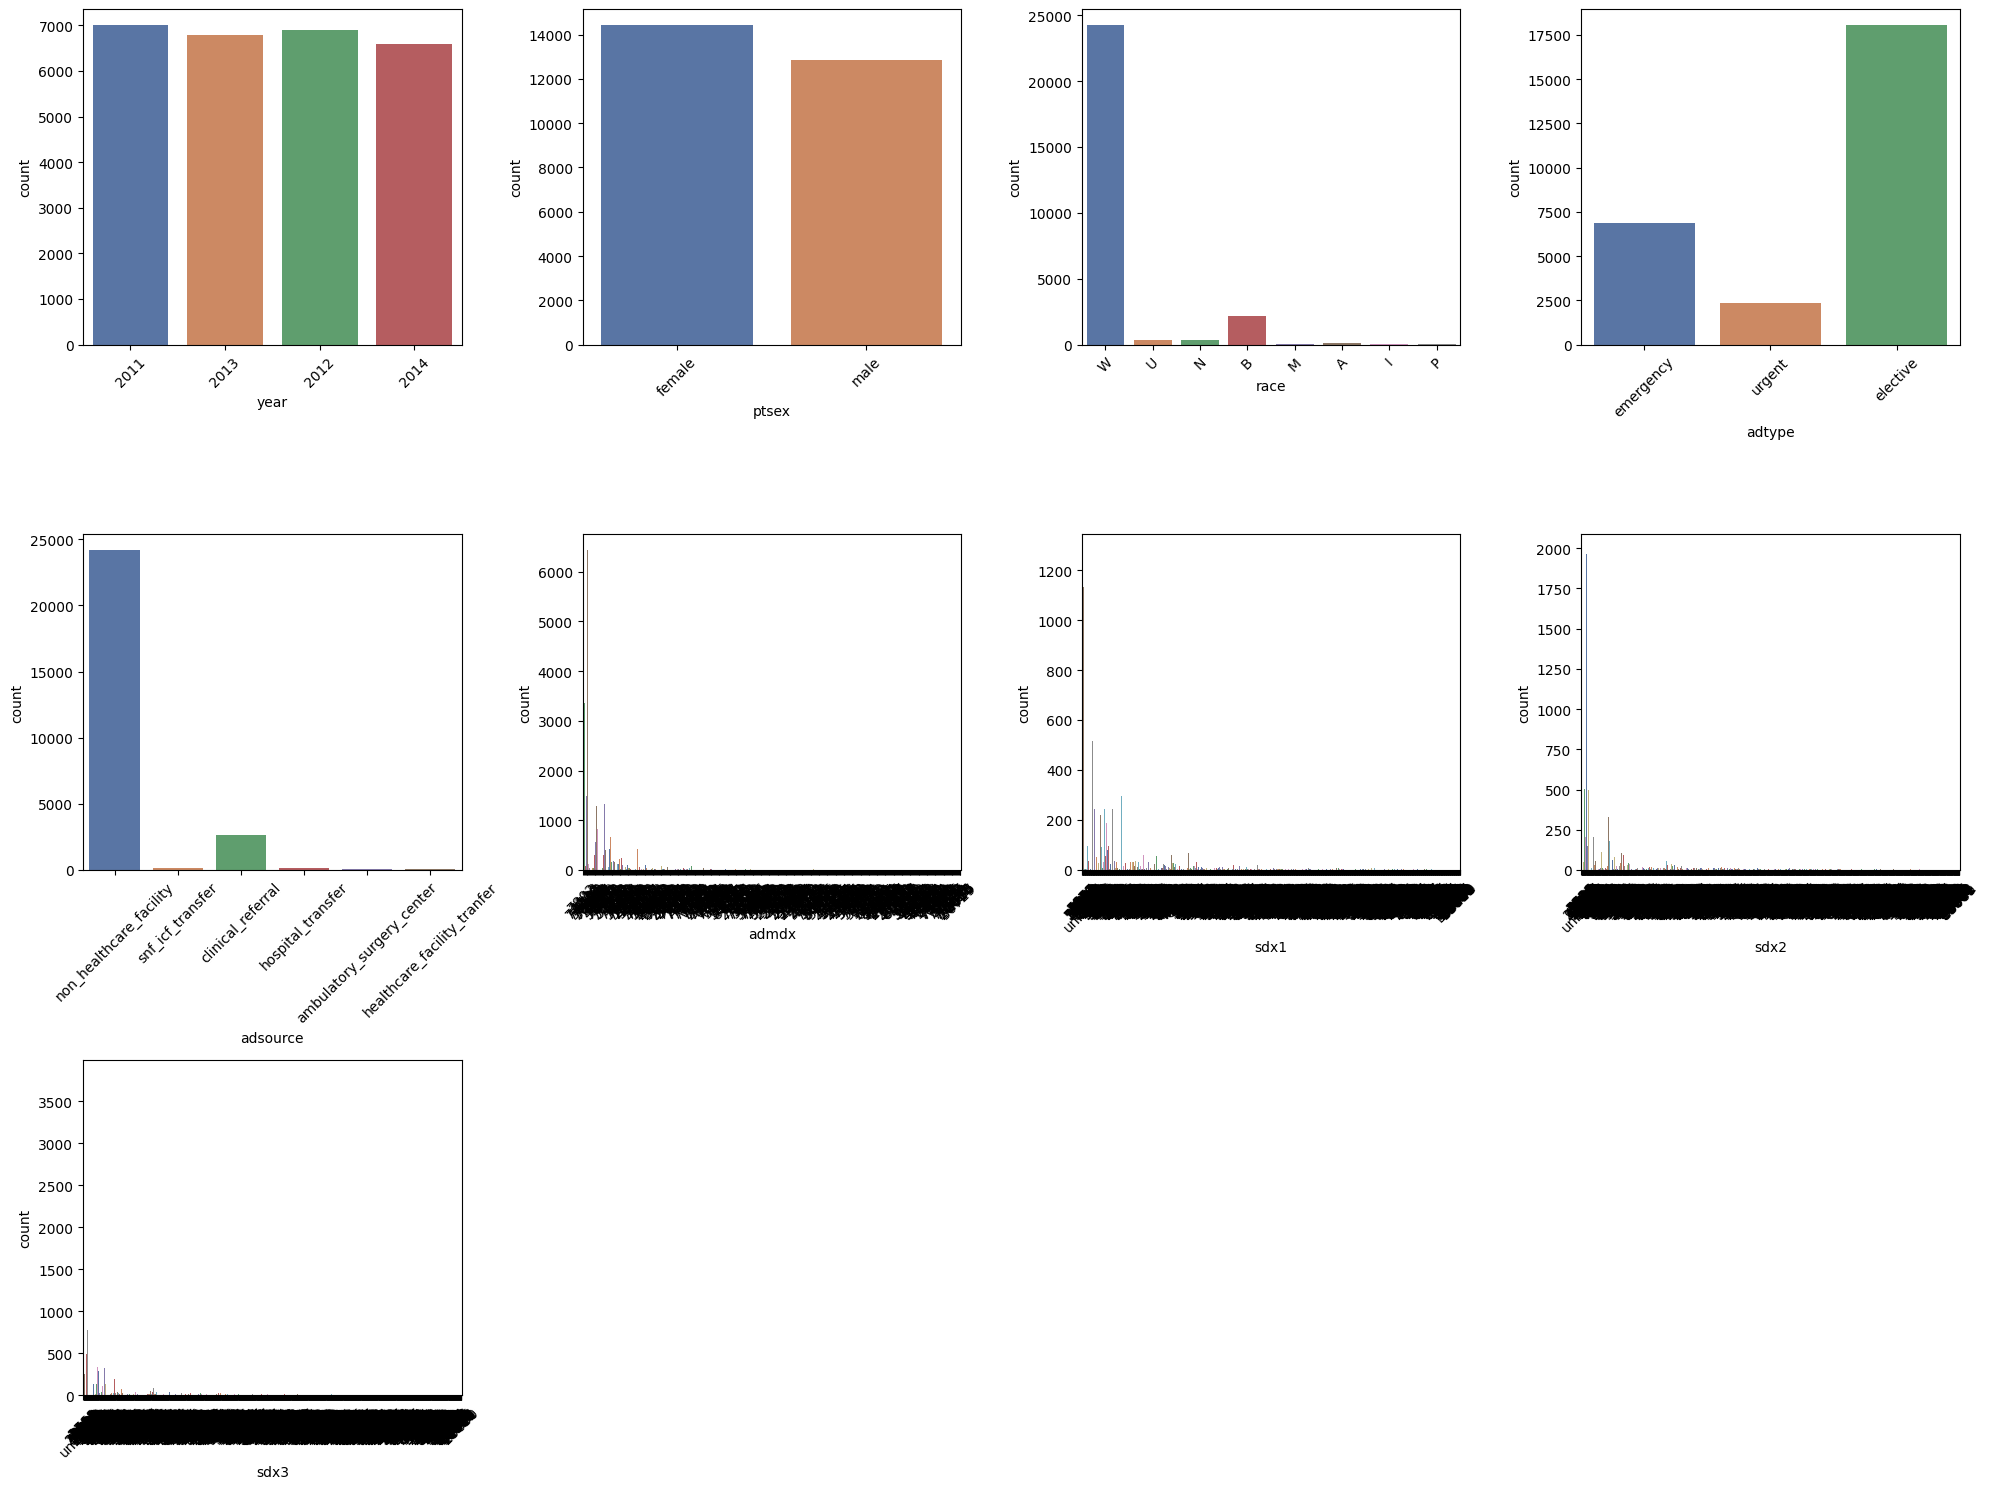

In [102]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(x = colectomy_cci_var[column], palette = 'deep', color = 'black', legend = False)
        plt.xlabel(column)
        plt.xticks(rotation = 45)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
# Split the training set into patients below the age of 60
colectomy_cci_var_public = colectomy_cci_var[colectomy_cci_var['age'] < 60]
# Split the testing set into patients above the age of 60
colectomy_cci_var_private_other = colectomy_cci_var[colectomy_cci_var['age'] >= 60]

print(f"Length of training set: {len(colectomy_cci_var_public)}")
print(f"Length of testing set: {len(colectomy_cci_var_private_other)}")

# Split the data into the in-distribution and out-of-distribution scenarios
train_X_OOD = colectomy_cci_var_public[features]
train_y_OOD = colectomy_cci_var_public['pdx'] 
test_X_OOD = colectomy_cci_var_private_other[features]
test_y_OOD = colectomy_cci_var_private_other['pdx']

val_X_OOD, test_X_OOD, val_y_OOD, test_y_OOD = train_test_split(test_X_OOD, test_y_OOD, test_size = 0.5, random_state = 0)

# One-Hot Encoding
train_X_OOD = pd.get_dummies(train_X_OOD, columns = dummy_features, dtype = 'int')
val_X_OOD = pd.get_dummies(val_X_OOD, columns = dummy_features, dtype = 'int')
test_X_OOD = pd.get_dummies(test_X_OOD, columns = dummy_features, dtype = 'int')

# Data Resampling
#smote = SMOTE(sampling_strategy = 'auto', random_state = 0)
#train_X, train_y = smote.fit_resample(train_X, train_y)

# Label Encoding
encoder = LabelEncoder()
label_encoder = encoder.fit(train_y_OOD)
train_y_OOD = label_encoder.transform(train_y_OOD)
test_y_OOD = label_encoder.transform(test_y_OOD)

X_train_OOD = train_X_OOD
X_test_OOD = test_X_OOD
Y_train_OOD = train_y_OOD
Y_test_OOD = test_y_OOD

Length of training set: 7773
Length of testing set: 13397


In [ ]:
# Split the training set into patients below the age of 60
colectomy_cci_var_public = colectomy_cci_var[colectomy_cci_var['age'] < 60]
# Split the testing set into patients above the age of 60
colectomy_cci_var_private_other = colectomy_cci_var[colectomy_cci_var['age'] >= 60]

# Select Relevant Features
features = ['year', 'ptsex', 'race', 'adtype', 'adsource', 'admdx']
dummy_features = ['year', 'ptsex', 'race', 'adtype', 'adsource']
frequency_features = ['admdx']

# Data Preprocessing
num_secondary_admissions = 3

for i in range(1, num_secondary_admissions + 1):
    sdx = f'sdx{i}'

    features.append(sdx)
    frequency_features.append(sdx)
    colectomy_cci_var[sdx] = colectomy_cci_var[sdx].fillna('unknown')

# Split the features and label
colectomy_cci_var_X = colectomy_cci_var[features]
colectomy_cci_var_y = colectomy_cci_var['pdx']

# One-Hot Encoding
colectomy_cci_var_X = pd.get_dummies(colectomy_cci_var_X, columns = features, dtype = 'int')

# Split Data
#train_X, test_X, train_y, test_y = train_test_split(colectomy_cci_var_X, colectomy_cci_var_y, test_size = 0.2, random_state = 0)
train_X, temp_X, train_y, temp_y = train_test_split(colectomy_cci_var_X, colectomy_cci_var_y, test_size = 0.3, random_state = 0)
val_X, test_X, val_y, test_y = train_test_split(temp_X, temp_y, test_size = 0.5, random_state = 0)

# Data Resampling
#smote = SMOTE(sampling_strategy = 'auto', random_state = 0)
#train_X, train_y = smote.fit_resample(train_X, train_y)

# Label Encoding
encoder = LabelEncoder()
label_encoder = encoder.fit(train_y)
train_y = label_encoder.transform(train_y)
val_y = label_encoder.transform(val_y)
test_y = label_encoder.transform(test_y)

X_train = train_X
X_val = val_X
X_test = test_X
Y_train = train_y
Y_val = val_y
Y_test = test_y

In [72]:
colectomy_cci_var = pd.read_csv('./colectomy_cci_var.csv', dtype = 'str')

# Set random seed
np.random.seed(42)

# Rename columns
colectomy_cci_var['ptsex'] = colectomy_cci_var['ptsex'].replace({'F': 'female', 'M': 'male'})
colectomy_cci_var['adtype'] = colectomy_cci_var['adtype'].replace({'1': 'emergency', '2': 'urgent', '3': 'elective'})
colectomy_cci_var['adsource'] = colectomy_cci_var['adsource'].replace({'1': 'non_healthcare_facility', '2': 'clinical_referral', '4': 'hospital_transfer', '5': 'snf_icf_transfer', '6': 'healthcare_facility_tranfer', '7': 'emergency_room', '8': 'court_law_enforcement', 'D': 'hospital_unit_transfer', 'E': 'ambulatory_surgery_center'})

colectomy_cci_var['age'] = colectomy_cci_var['age'].astype(int)

colectomy_cci_var['paytype1'] = colectomy_cci_var['paytype1'].fillna('99')

# Drop observations
colectomy_cci_var = colectomy_cci_var[colectomy_cci_var['adsource'] != '9']
colectomy_cci_var = colectomy_cci_var[colectomy_cci_var['adsource'] != 'emergency_room']
colectomy_cci_var = colectomy_cci_var[colectomy_cci_var['adsource'] != 'court_law_enforcement']
colectomy_cci_var = colectomy_cci_var[colectomy_cci_var['adsource'] != 'hospital_unit_transfer']

#print(len(colectomy_cci_var))
def get_parent_code(code):
    if search(code) is None:
        return 'uknown'
    else:
        return search(code).parent.code

#colectomy_cci_var['pdx'] = colectomy_cci_var['pdx'].apply(get_parent_code)

colectomy_cci_var = colectomy_cci_var.groupby('pdx').filter(lambda x: len(x) >= 1000)
#print(len(colectomy_cci_var))

# Select Relevant Features
features = ['year', 'ptsex', 'race', 'age', 'adtype', 'adsource', 'admdx']
dummy_features = ['year', 'ptsex', 'race', 'adtype', 'adsource']
frequency_features = ['admdx']

# Data Preprocessing
num_secondary_admissions = 3

for i in range(1, num_secondary_admissions + 1):
    sdx = f'sdx{i}'

    features.append(sdx)
    frequency_features.append(sdx)

    # Replace missing values with the "unknown" category
    colectomy_cci_var[sdx] = colectomy_cci_var[sdx].fillna('unknown')
    #colectomy_cci_var[sdx] = colectomy_cci_var[sdx].fillna(-1)

for feature in frequency_features:
    #print(colectomy_cci_var[feature].isna().sum())
    print(f"Feature: {feature}")
    print(len(colectomy_cci_var[feature].value_counts()))
    #colectomy_cci_var[feature] = colectomy_cci_var[feature].apply(get_parent_code)
    print(len(colectomy_cci_var[feature].value_counts()))

    encoder = LabelEncoder()
    colectomy_cci_var[feature] = encoder.fit_transform(colectomy_cci_var[feature])
    colectomy_cci_var[feature] = colectomy_cci_var[feature].astype(int)

#for feature in features:
#    print(colectomy_cci_var[feature].value_counts())

colectomy_cci_var_X = colectomy_cci_var[features]
colectomy_cci_var_y = colectomy_cci_var['pdx']

# One-Hot Encoding
colectomy_cci_var_X = pd.get_dummies(colectomy_cci_var_X, columns = dummy_features, dtype = 'int')

# Split Data
#train_X, test_X, train_y, test_y = train_test_split(colectomy_cci_var_X, colectomy_cci_var_y, test_size = 0.2, random_state = 0)
train_X, temp_X, train_y, temp_y = train_test_split(colectomy_cci_var_X, colectomy_cci_var_y, test_size = 0.4, random_state = 0)  # 60% train, 40% temp
val_X, test_X, val_y, test_y = train_test_split(temp_X, temp_y, test_size = 0.5, random_state = 0)

# Data Resampling
#smote = SMOTE(sampling_strategy = 'auto', random_state = 0)
#train_X, train_y = smote.fit_resample(train_X, train_y)

#oversampler = RandomOverSampler(random_state = 0)
#train_X, train_y = oversampler.fit_resample(train_X, train_y)

# Frequency encoding
for feature in frequency_features:
    category_counts = train_X[feature].value_counts()
    train_X[feature] = train_X[feature].map(category_counts)

    category_counts = val_X[feature].value_counts()
    val_X[feature] = val_X[feature].map(category_counts)

    category_counts = test_X[feature].value_counts()
    test_X[feature] = test_X[feature].map(category_counts)

# Label Encoding
encoder = LabelEncoder()
label_encoder = encoder.fit(train_y)
train_y = label_encoder.transform(train_y)
val_y = label_encoder.transform(val_y)
test_y = label_encoder.transform(test_y)

# Normalize Data
normalize_features = list(set(features) - set(dummy_features))

scaler = StandardScaler()

train_X_normalized = train_X.copy()
val_X_normalized = val_X.copy()
test_X_normalzied = test_X.copy()

normalizer = scaler.fit(train_X_normalized[normalize_features])

train_X_normalized[normalize_features] = normalizer.transform(train_X_normalized[normalize_features])
val_X_normalized[normalize_features] = normalizer.transform(val_X_normalized[normalize_features])
test_X_normalzied[normalize_features] = normalizer.transform(test_X_normalzied[normalize_features])

X_train = train_X_normalized
X_val = val_X_normalized
X_test = test_X_normalzied
Y_train = train_y
Y_val = val_y
Y_test = test_y

Feature: admdx
354
354
Feature: sdx1
1201
1201
Feature: sdx2
1300
1300
Feature: sdx3
1337
1337


# Training Models

In [73]:
# Random Forest
clf_rand_forest = RandomForestClassifier()
clf_rand_forest.fit(X_train, Y_train)

RandomForestClassifier()

In [74]:
# SVM
clf_svm = svm.SVC(kernel = 'linear')
clf_svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [75]:
# Naive Bayes
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, Y_train)

GaussianNB()

In [76]:
# Logistic Regression
clf_log = LogisticRegression(solver = 'lbfgs', max_iter = 2500)
clf_log.fit(X_train, Y_train)

LogisticRegression(max_iter=2500)

In [77]:
# KNN
clf_knn = KNeighborsClassifier(n_neighbors = 5)
clf_knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [78]:
# XG Boost
clf_xgb = XGBClassifier(objective = 'multi:softmax', 
                        learning_rate = 0.5, 
                        max_depth = 5, 
                        n_estimators = 150, 
                        eval_metric = 'mlogloss',  
                        use_label_encoder = False)
clf_xgb.fit(X_train, Y_train)

/opt/anaconda3/envs/DS340W/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning:

[16:24:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, objective='multi:softmax', ...)

In [79]:
# Decision Tree
clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [80]:
# Ada Boost
clf_ada = AdaBoostClassifier(estimator = clf_dtc)
clf_ada.fit(X_train, Y_train)

/opt/anaconda3/envs/DS340W/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoostClassifier(estimator=DecisionTreeClassifier())

In [81]:
# Model Architecture
class BayesianNeuralNetwork(nn.Module):
    def __init__(self, feature_size, num_classes):
        super().__init__()

        layer_1_size = 32
        layer_2_size = 32
        layer_3_size = 32
        layer_4_size = 32

        prior_mean = 0
        prior_variance = 1

        # Layers
        self.bayes_linear_1 = bnn.BayesLinear(prior_mu = prior_mean, prior_sigma = prior_variance, in_features = feature_size, out_features = layer_1_size)
        self.bayes_linear_2 = bnn.BayesLinear(prior_mu = prior_mean, prior_sigma = prior_variance, in_features = layer_1_size, out_features = layer_2_size)
        self.bayes_linear_3 = bnn.BayesLinear(prior_mu = prior_mean, prior_sigma = prior_variance, in_features = layer_2_size, out_features = layer_3_size)
        self.bayes_linear_4 = bnn.BayesLinear(prior_mu = prior_mean, prior_sigma = prior_variance, in_features = layer_3_size, out_features = layer_4_size)
        self.output_layer = nn.Linear(in_features = layer_4_size, out_features = num_classes)
    
    def forward(self, x):
        x = torch.relu(self.bayes_linear_1(x))
        x = torch.relu(self.bayes_linear_2(x))
        x = torch.relu(self.bayes_linear_3(x))
        x = torch.relu(self.bayes_linear_4(x))
        logits = self.output_layer(x)
        #probabilities = torch.softmax(logits, dim=-1)
        return logits
    
# Loss Function
def elbo_loss(output, target, model):
    standard_loss = nn.CrossEntropyLoss()(output, target)
    # The BKLLoss function automatically predfines the variational distribution as a normal distribution
    kl_loss = bnn.BKLLoss(reduction = 'mean', last_layer_only = False)

    return standard_loss + kl_loss(model)

def train(model, train_loader, optimizer, epochs = 5):
    model.train()
    for epoch in range(epochs):
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = elbo_loss(output, target, model)
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch + 1}, Loss: {loss.item()}")
        
        '''
        # After each epoch, evaluate on the validation set
        model.eval()  # Set model to evaluation mode
        val_loss = 0.0
        with torch.no_grad():
            for data, target in val_loader:
                output = model(data)
                val_loss += elbo_loss(output, target, model).item()

        # Calculate average validation loss
        val_loss /= len(val_loader)

        print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}")

        # Save the model if it has improved
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict()  # Save model parameters
            best_posterior = model
        '''

best_val_loss = float('inf')  # Initialize best validation loss to a high value
best_model_state = None  # To store the best model's state_dict
best_posterior = None

X_train_tensor = torch.tensor(X_train.values).float()
Y_train_tensor = torch.tensor(pd.Series(Y_train).values).long()

dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(dataset, batch_size = 32, shuffle = True)

model = BayesianNeuralNetwork(feature_size = X_train.shape[1], num_classes = len(torch.unique(Y_train_tensor)))
optimizer = optim.Adam(model.parameters(), lr = 0.001)
train(model, train_loader, optimizer, 10)

Epoch 1, Loss: 25.662002563476562
Epoch 2, Loss: 5.399649143218994
Epoch 3, Loss: 1.7357118129730225
Epoch 4, Loss: 1.7766278982162476
Epoch 5, Loss: 1.7212529182434082
Epoch 6, Loss: 1.8220760822296143
Epoch 7, Loss: 2.0358693599700928
Epoch 8, Loss: 2.0059385299682617
Epoch 9, Loss: 2.2071189880371094
Epoch 10, Loss: 1.7470961809158325


In [82]:
for name, param in model.named_parameters():
    if 'weight' in name:  # Filter for weight parameters
        print(f"Weight Parameter: {name}, Shape: {param.shape}, Value: {param}")

Weight Parameter: bayes_linear_1.weight_mu, Shape: torch.Size([32, 28]), Value: Parameter containing:
tensor([[-1.6827e-01,  7.8867e-02, -1.2381e-01,  1.8539e-04, -6.6136e-02,
          3.3374e-02, -2.0209e-01, -5.3862e-02, -3.0556e-02, -9.7230e-02,
         -1.6639e-01, -6.4559e-02,  2.9009e-02, -1.0685e-02,  6.0603e-02,
         -8.0889e-02, -6.4874e-03, -1.8644e-01, -2.9902e-01, -5.9295e-02,
         -1.1469e-01, -2.3883e-01,  8.5944e-02, -1.8149e-01, -2.6352e-02,
          5.3808e-02,  1.5814e-02,  3.6790e-02],
        [ 1.0214e-01,  2.8613e-01, -5.2231e-02,  1.9830e-01,  1.8430e-01,
         -3.0384e-01, -2.5258e-01, -2.6390e-01, -1.7139e-01, -1.7809e-01,
         -3.0409e-01, -2.5527e-02, -8.7091e-02,  2.3589e-02,  6.0784e-02,
          1.1015e-01,  7.3235e-04, -3.6453e-03, -1.2355e-01, -2.5231e-01,
         -1.2773e-01,  2.9656e-02, -1.1084e-01, -1.5254e-01, -4.8468e-02,
          2.6331e-02, -2.7770e-01, -5.7761e-02],
        [ 1.2821e-02,  2.3540e-01, -2.0145e-02,  1.1354e-01,

In [83]:
temp = torch.tensor(X_test.iloc[0].values).float()

model(temp)

tensor([4.7410, 4.7094, 6.2969, 6.0869, 5.8963, 8.5386],
       grad_fn=<ViewBackward0>)

In [84]:
X_test_tensor = torch.tensor(X_test.values).float()

# Sampling from posterior (to account for uncertainty in predictions)
num_samples = 100  # Number of posterior samples

model.eval()  # Set model to evaluation mode
outputs = []

with torch.no_grad():
    for i in range(num_samples):
        output_sample = model(X_test_tensor) # Forward pass with sampled weights
        outputs.append(output_sample)

# Convert outputs to numpy for easier processing
outputs = torch.stack(outputs).numpy()  # Shape: (num_samples, num_test_samples, num_classes)
# Get the mean output across posterior samples
mean_output = np.mean(outputs, axis = 0)  # Shape: (num_test_samples, num_classes)

# Get predicted class (for classification, pick the class with the highest probability)
predicted_classes = np.argmax(mean_output, axis = 1)

# Evaluate the performance using sklearn metrics
accuracy = accuracy_score(Y_test, predicted_classes)
report = classification_report(Y_test, predicted_classes, zero_division = 1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")

Accuracy: 0.4202
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       232
           1       1.00      0.00      0.00       491
           2       1.00      0.00      0.00       469
           3       1.00      0.00      0.00       525
           4       1.00      0.00      0.00       738
           5       0.42      1.00      0.59      1779

    accuracy                           0.42      4234
   macro avg       0.90      0.17      0.10      4234
weighted avg       0.76      0.42      0.25      4234



In [85]:
# During inference, check weights and make sure they change with each forward pass
with torch.no_grad():  # Disable gradient tracking
    for _ in range(5):  # Check multiple times to observe different weights
        output = model(X_test_tensor)  # Forward pass with sampled weights
        for name, param in model.named_parameters():
            if 'bayes_linear' in name:  # Check only the Bayesian layers
                print(f"Weight sample: {param.data}")

Weight sample: tensor([[-1.6827e-01,  7.8867e-02, -1.2381e-01,  1.8539e-04, -6.6136e-02,
          3.3374e-02, -2.0209e-01, -5.3862e-02, -3.0556e-02, -9.7230e-02,
         -1.6639e-01, -6.4559e-02,  2.9009e-02, -1.0685e-02,  6.0603e-02,
         -8.0889e-02, -6.4874e-03, -1.8644e-01, -2.9902e-01, -5.9295e-02,
         -1.1469e-01, -2.3883e-01,  8.5944e-02, -1.8149e-01, -2.6352e-02,
          5.3808e-02,  1.5814e-02,  3.6790e-02],
        [ 1.0214e-01,  2.8613e-01, -5.2231e-02,  1.9830e-01,  1.8430e-01,
         -3.0384e-01, -2.5258e-01, -2.6390e-01, -1.7139e-01, -1.7809e-01,
         -3.0409e-01, -2.5527e-02, -8.7091e-02,  2.3589e-02,  6.0784e-02,
          1.1015e-01,  7.3235e-04, -3.6453e-03, -1.2355e-01, -2.5231e-01,
         -1.2773e-01,  2.9656e-02, -1.1084e-01, -1.5254e-01, -4.8468e-02,
          2.6331e-02, -2.7770e-01, -5.7761e-02],
        [ 1.2821e-02,  2.3540e-01, -2.0145e-02,  1.1354e-01,  2.0303e-03,
         -2.2808e-01, -1.5620e-01,  6.2948e-02,  6.2705e-02,  3.0808e-02,

# Training OOD Models

In [86]:
# Random Forest
clf_rand_forest_OOD = RandomForestClassifier()
clf_rand_forest_OOD.fit(X_train_OOD, Y_train_OOD)

NameError: name 'X_train_OOD' is not defined

In [ ]:
# SVM
clf_svm_OOD = svm.SVC(kernel = 'linear')
clf_svm_OOD.fit(X_train_OOD, Y_train_OOD)

SVC(kernel='linear')

In [ ]:
# Naive Bayes
clf_gnb_OOD = GaussianNB()
clf_gnb_OOD.fit(X_train_OOD, Y_train_OOD)

GaussianNB()

In [ ]:
# Logistic Regression
clf_log_OOD = LogisticRegression(solver = 'lbfgs', max_iter = 2500)
clf_log_OOD.fit(X_train_OOD, Y_train_OOD)

LogisticRegression(max_iter=2500)

In [ ]:
# KNN
clf_knn_OOD = KNeighborsClassifier(n_neighbors = 5)
clf_knn_OOD.fit(X_train_OOD, Y_train_OOD)

KNeighborsClassifier()

In [ ]:
# XG Boost
clf_xgb_OOD = XGBClassifier(objective = 'multi:softmax', 
                        learning_rate = 0.5, 
                        max_depth = 5, 
                        n_estimators = 150, 
                        eval_metric = 'mlogloss',  
                        use_label_encoder = False)
clf_xgb_OOD.fit(X_train_OOD, Y_train_OOD)

/opt/anaconda3/envs/DS340W/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:11:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
# Decision Tree
clf_dtc_OOD = DecisionTreeClassifier()
clf_dtc_OOD.fit(X_train_OOD, Y_train_OOD)

DecisionTreeClassifier()

In [ ]:
# Ada Boost
clf_ada_OOD = AdaBoostClassifier(estimator = clf_dtc_OOD)
clf_ada_OOD.fit(X_train_OOD, Y_train_OOD)

/opt/anaconda3/envs/DS340W/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier())

# Evaluation

### Random Forest

#### Classification Report

In [87]:
Y_pred = clf_rand_forest.predict(X_test)

rand_forest_acc = accuracy_score(Y_test, Y_pred)

print(f"Accuracy: {rand_forest_acc}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test, Y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test, Y_pred)}")
print(f"Classification Report: \n{classification_report(Y_test, Y_pred, zero_division = 1)}")

Accuracy: 0.2966461974492206
Mean Absolute Error: 1.7394898441190363
Mean Squared Error: 5.265706188001889
Classification Report: 
              precision    recall  f1-score   support

           0       0.09      0.11      0.10       232
           1       0.09      0.14      0.11       491
           2       0.10      0.19      0.13       469
           3       0.20      0.22      0.21       525
           4       0.12      0.06      0.08       738
           5       0.68      0.52      0.59      1779

    accuracy                           0.30      4234
   macro avg       0.21      0.21      0.20      4234
weighted avg       0.36      0.30      0.32      4234



### SVM

#### Classification Report

In [88]:
Y_pred = clf_svm.predict(X_test)

svm_acc = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {svm_acc}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test, Y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test, Y_pred)}")
print(f"Classification Report: \n{classification_report(Y_test, Y_pred, zero_division = 1)}")

Accuracy: 0.228389230042513
Mean Absolute Error: 1.9617383089277278
Mean Squared Error: 6.130845536136041
Classification Report: 
              precision    recall  f1-score   support

           0       0.33      0.00      0.01       232
           1       0.11      0.39      0.18       491
           2       0.22      0.19      0.20       469
           3       0.18      0.50      0.26       525
           4       1.00      0.00      0.00       738
           5       0.65      0.24      0.35      1779

    accuracy                           0.23      4234
   macro avg       0.42      0.22      0.17      4234
weighted avg       0.53      0.23      0.22      4234



### Naive Bayes

#### Classification Report

In [89]:
Y_pred = clf_gnb.predict(X_test)

gnb_acc = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {gnb_acc}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test, Y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test, Y_pred)}")
print(f"Classification Report: \n{classification_report(Y_test, Y_pred, zero_division = 1)}")

Accuracy: 0.05786490316485593
Mean Absolute Error: 3.461738308927728
Mean Squared Error: 14.688001889466225
Classification Report: 
              precision    recall  f1-score   support

           0       0.06      0.98      0.11       232
           1       0.08      0.01      0.02       491
           2       1.00      0.00      0.00       469
           3       1.00      0.00      0.00       525
           4       0.20      0.01      0.03       738
           5       1.00      0.00      0.00      1779

    accuracy                           0.06      4234
   macro avg       0.56      0.17      0.03      4234
weighted avg       0.70      0.06      0.01      4234



### Logistic Regression

#### Classification Report

In [90]:
Y_pred = clf_log.predict(X_test)

log_acc = accuracy_score(Y_test, Y_pred)

print(f"Accuracy: {log_acc}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test, Y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test, Y_pred)}")
print(f"Classification Report: \n{classification_report(Y_test, Y_pred, zero_division = 1)}")

Accuracy: 0.3559282002834199
Mean Absolute Error: 1.0862068965517242
Mean Squared Error: 2.464100141709967
Classification Report: 
              precision    recall  f1-score   support

           0       0.20      0.00      0.01       232
           1       0.28      0.36      0.32       491
           2       0.23      0.20      0.22       469
           3       0.23      0.52      0.32       525
           4       0.27      0.44      0.34       738
           5       0.78      0.36      0.49      1779

    accuracy                           0.36      4234
   macro avg       0.33      0.31      0.28      4234
weighted avg       0.47      0.36      0.37      4234



### KNN

#### Classification Report

In [91]:
Y_pred = clf_knn.predict(X_test)

knn_acc = accuracy_score(Y_test, Y_pred)

print(f"Accuracy: {knn_acc}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test, Y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test, Y_pred)}")
print(f"Classification Report: \n{classification_report(Y_test, Y_pred, zero_division = 1)}")

Accuracy: 0.1759565422768068
Mean Absolute Error: 1.9983467170524327
Mean Squared Error: 6.073925366084081
Classification Report: 
              precision    recall  f1-score   support

           0       0.11      0.23      0.15       232
           1       0.09      0.21      0.13       491
           2       0.15      0.22      0.18       469
           3       0.13      0.20      0.16       525
           4       0.09      0.06      0.07       738
           5       0.57      0.19      0.28      1779

    accuracy                           0.18      4234
   macro avg       0.19      0.19      0.16      4234
weighted avg       0.30      0.18      0.19      4234



### XG_Boost

#### Classification Report

In [92]:
Y_pred = clf_xgb.predict(X_test)

xgb_acc = accuracy_score(Y_test, Y_pred)

print(f"Accuracy: {xgb_acc}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test, Y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test, Y_pred)}")
print(f"Classification Report: \n{classification_report(Y_test, Y_pred, zero_division = 1)}")

Accuracy: 0.3906471421823335
Mean Absolute Error: 1.4501653282947566
Mean Squared Error: 4.099669343410486
Classification Report: 
              precision    recall  f1-score   support

           0       0.05      0.01      0.02       232
           1       0.22      0.15      0.18       491
           2       0.07      0.15      0.10       469
           3       0.28      0.21      0.24       525
           4       0.14      0.06      0.09       738
           5       0.63      0.76      0.69      1779

    accuracy                           0.39      4234
   macro avg       0.23      0.22      0.22      4234
weighted avg       0.36      0.39      0.37      4234



### Decision Tree

#### Classification Report

In [93]:
Y_pred = clf_dtc.predict(X_test)

dtc_acc = accuracy_score(Y_test, Y_pred)

print(f"Accuracy: {dtc_acc}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test, Y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test, Y_pred)}")
print(f"Classification Report: \n{classification_report(Y_test, Y_pred, zero_division = 1)}")

Accuracy: 0.2647614548889939
Mean Absolute Error: 1.8530940009447332
Mean Squared Error: 5.736419461502126
Classification Report: 
              precision    recall  f1-score   support

           0       0.06      0.15      0.09       232
           1       0.28      0.27      0.28       491
           2       0.06      0.14      0.09       469
           3       0.12      0.10      0.11       525
           4       0.12      0.07      0.09       738
           5       0.61      0.44      0.51      1779

    accuracy                           0.26      4234
   macro avg       0.21      0.20      0.19      4234
weighted avg       0.34      0.26      0.29      4234



### Ada Boost

#### Classification Report

In [94]:
Y_pred = clf_ada.predict(X_test)

ada_acc = accuracy_score(Y_test, Y_pred)

print(f"Accuracy: {ada_acc}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test, Y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test, Y_pred)}")
print(f"Classification Report: \n{classification_report(Y_test, Y_pred, zero_division = 1)}")

Accuracy: 0.25484175720359
Mean Absolute Error: 1.8873405762871989
Mean Squared Error: 5.918516769012754
Classification Report: 
              precision    recall  f1-score   support

           0       0.06      0.15      0.09       232
           1       0.24      0.22      0.23       491
           2       0.06      0.14      0.09       469
           3       0.14      0.12      0.13       525
           4       0.10      0.07      0.08       738
           5       0.60      0.43      0.50      1779

    accuracy                           0.25      4234
   macro avg       0.20      0.19      0.19      4234
weighted avg       0.32      0.25      0.28      4234



# Model Comparison

In [ ]:
models = pd.DataFrame({
    'Model' : [ 'Random Forest Classifier', 'SVM Classifier', 'Naive Bayes Classifier','KNN Classifier', 'XG_Boost Classifier', 'Decision Tree Classifier', 'Ada_Boost Classifier'],
    'Score' : [rand_forest_acc, svm_acc, gnb_acc, knn_acc, xgb_acc, dtc_acc, ada_acc]
})

sorted_models = models.sort_values(by = 'Score', ascending = True)

fig = px.bar(data_frame = sorted_models, x = 'Score', y = 'Model', title = 'Models Comparison')

fig.show()

In [96]:
Y_pred = clf_rand_forest_OOD.predict(X_test_OOD)

rand_forest_acc_OOD = accuracy_score(Y_test_OOD, Y_pred)

print(f"Accuracy: {rand_forest_acc_OOD}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test_OOD, Y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test_OOD, Y_pred)}")
print(f"Classification Report: \n{classification_report(Y_test_OOD, Y_pred, zero_division = 1)}")

NameError: name 'X_test_OOD' is not defined

In [ ]:
Y_pred = clf_svm_OOD.predict(X_test_OOD)

svm_acc_OOD = accuracy_score(Y_test_OOD, Y_pred)

print(f"Accuracy: {svm_acc_OOD}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test_OOD, Y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test_OOD, Y_pred)}")
print(f"Classification Report: \n{classification_report(Y_test_OOD, Y_pred, zero_division = 1)}")

Accuracy: 0.4886914980965888
Mean Absolute Error: 1.180786743300739
Mean Squared Error: 3.422482645368366
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       972
           1       0.20      0.65      0.30      1536
           2       1.00      0.00      0.00      1880
           3       1.00      0.00      0.00      2295
           4       0.89      0.72      0.80      2686
           5       0.58      0.90      0.71      4028

    accuracy                           0.49     13397
   macro avg       0.78      0.38      0.30     13397
weighted avg       0.76      0.49      0.41     13397



In [ ]:
Y_pred = clf_gnb_OOD.predict(X_test_OOD)

gnb_acc_OOD = accuracy_score(Y_test_OOD, Y_pred)

print(f"Accuracy: {gnb_acc_OOD}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test_OOD, Y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test_OOD, Y_pred)}")
print(f"Classification Report: \n{classification_report(Y_test_OOD, Y_pred, zero_division = 1)}")

Accuracy: 0.1660819586474584
Mean Absolute Error: 1.876091662312458
Mean Squared Error: 6.149137866686572
Classification Report: 
              precision    recall  f1-score   support

           0       0.02      0.05      0.03       972
           1       0.18      0.01      0.03      1536
           2       0.22      0.70      0.34      1880
           3       0.19      0.33      0.24      2295
           4       0.01      0.00      0.00      2686
           5       1.00      0.02      0.04      4028

    accuracy                           0.17     13397
   macro avg       0.27      0.19      0.11     13397
weighted avg       0.39      0.17      0.11     13397



In [ ]:
Y_pred = clf_log_OOD.predict(X_test_OOD)

log_acc_OOD = accuracy_score(Y_test_OOD, Y_pred)

print(f"Accuracy: {log_acc_OOD}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test_OOD, Y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test_OOD, Y_pred)}")
print(f"Classification Report: \n{classification_report(Y_test_OOD, Y_pred, zero_division = 1)}")

Accuracy: 0.3196237963723222
Mean Absolute Error: 1.4051653355228784
Mean Squared Error: 3.840188101813839
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       972
           1       0.15      0.27      0.19      1536
           2       0.30      0.01      0.02      1880
           3       0.24      0.02      0.03      2295
           4       0.10      0.10      0.10      2686
           5       0.45      0.88      0.60      4028

    accuracy                           0.32     13397
   macro avg       0.21      0.21      0.16     13397
weighted avg       0.26      0.32      0.23     13397



In [ ]:
Y_pred = clf_knn_OOD.predict(X_test_OOD)

knn_acc_OOD = accuracy_score(Y_test_OOD, Y_pred)

print(f"Accuracy: {knn_acc_OOD}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test_OOD, Y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test_OOD, Y_pred)}")
print(f"Classification Report: \n{classification_report(Y_test_OOD, Y_pred, zero_division = 1)}")

Accuracy: 0.42703590356049864
Mean Absolute Error: 1.3250727774874973
Mean Squared Error: 3.893110397850265
Classification Report: 
              precision    recall  f1-score   support

           0       0.12      0.08      0.10       972
           1       0.18      0.33      0.24      1536
           2       0.24      0.08      0.12      1880
           3       0.28      0.11      0.16      2295
           4       0.60      0.52      0.56      2686
           5       0.55      0.82      0.66      4028

    accuracy                           0.43     13397
   macro avg       0.33      0.33      0.31     13397
weighted avg       0.40      0.43      0.39     13397



In [ ]:
Y_pred = clf_xgb_OOD.predict(X_test_OOD)

xgb_acc_OOD = accuracy_score(Y_test_OOD, Y_pred)

print(f"Accuracy: {xgb_acc_OOD}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test_OOD, Y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test_OOD, Y_pred)}")
print(f"Classification Report: \n{classification_report(Y_test_OOD, Y_pred, zero_division = 1)}")

Accuracy: 0.7315816973949392
Mean Absolute Error: 0.5656490259013212
Mean Squared Error: 1.5395984175561692
Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.48      0.57       972
           1       0.53      0.64      0.58      1536
           2       0.68      0.48      0.56      1880
           3       0.72      0.52      0.60      2295
           4       0.79      0.88      0.83      2686
           5       0.79      0.97      0.87      4028

    accuracy                           0.73     13397
   macro avg       0.70      0.66      0.67     13397
weighted avg       0.73      0.73      0.72     13397



In [ ]:
Y_pred = clf_dtc_OOD.predict(X_test_OOD)

dtc_acc_OOD = accuracy_score(Y_test_OOD, Y_pred)

print(f"Accuracy: {dtc_acc_OOD}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test_OOD, Y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test_OOD, Y_pred)}")
print(f"Classification Report: \n{classification_report(Y_test_OOD, Y_pred, zero_division = 1)}")

Accuracy: 0.6817944315891618
Mean Absolute Error: 0.6794804807046354
Mean Squared Error: 1.888407852504292
Classification Report: 
              precision    recall  f1-score   support

           0       0.52      0.49      0.50       972
           1       0.51      0.60      0.55      1536
           2       0.56      0.48      0.52      1880
           3       0.60      0.52      0.56      2295
           4       0.75      0.79      0.77      2686
           5       0.83      0.88      0.85      4028

    accuracy                           0.68     13397
   macro avg       0.63      0.62      0.62     13397
weighted avg       0.68      0.68      0.68     13397



In [ ]:
Y_pred = clf_ada_OOD.predict(X_test_OOD)

ada_acc_OOD = accuracy_score(Y_test_OOD, Y_pred)

print(f"Accuracy: {ada_acc_OOD}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test_OOD, Y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test_OOD, Y_pred)}")
print(f"Classification Report: \n{classification_report(Y_test_OOD, Y_pred, zero_division = 1)}")

Accuracy: 0.682242293050683
Mean Absolute Error: 0.6791819063969545
Mean Squared Error: 1.8824363663506756
Classification Report: 
              precision    recall  f1-score   support

           0       0.58      0.47      0.52       972
           1       0.48      0.62      0.54      1536
           2       0.57      0.47      0.52      1880
           3       0.62      0.51      0.56      2295
           4       0.76      0.78      0.77      2686
           5       0.81      0.89      0.85      4028

    accuracy                           0.68     13397
   macro avg       0.64      0.62      0.63     13397
weighted avg       0.68      0.68      0.68     13397



In [ ]:
models = pd.DataFrame({
    'Model' : [ 'Random Forest Classifier', 'SVM Classifier', 'Naive Bayes Classifier','KNN Classifier', 'XG_Boost Classifier', 'Decision Tree Classifier', 'Ada_Boost Classifier'],
    'Score' : [rand_forest_acc_OOD, svm_acc_OOD, gnb_acc_OOD, knn_acc_OOD, xgb_acc_OOD, dtc_acc_OOD, ada_acc_OOD]
})

sorted_models = models.sort_values(by = 'Score', ascending = True)

fig = px.bar(data_frame = sorted_models, x = 'Score', y = 'Model', title=  'Models Comparison')

fig.show()

In [ ]:
importances = clf_rand_forest_OOD.feature_importances_

# Sort and display feature importances
sorted_idx = importances.argsort()
for idx in sorted_idx:
    print(f"Feature: {X_train.columns[idx]}, Importance: {importances[idx]}")

Feature: adsource_snf_icf_transfer, Importance: 0.00010110578295455266
Feature: race_M, Importance: 0.00013976469859768302
Feature: race_P, Importance: 0.0001438872893073924
Feature: race_I, Importance: 0.00022501759237318505
Feature: adsource_healthcare_facility_tranfer, Importance: 0.00040720015425988176
Feature: adsource_ambulatory_surgery_center, Importance: 0.00041072964997422123
Feature: adsource_hospital_transfer, Importance: 0.0008306809538980948
Feature: race_A, Importance: 0.0013499187357572432
Feature: race_U, Importance: 0.0022857764940396566
Feature: race_N, Importance: 0.0024545937090144337
Feature: adtype_urgent, Importance: 0.004068622065049251
Feature: adsource_clinical_referral, Importance: 0.006148066378257995
Feature: adsource_non_healthcare_facility, Importance: 0.006552838600534443
Feature: race_B, Importance: 0.006714555698372217
Feature: race_W, Importance: 0.008074257112557222
Feature: ptsex_female, Importance: 0.008562566473366926
Feature: ptsex_male, Importan

In [ ]:
models = [ 'Random Forest Classifier', 'SVM Classifier', 'Naive Bayes Classifier','KNN Classifier', 'XG_Boost Classifier', 'Decision Tree Classifier', 'Ada_Boost Classifier']
ID_accuracies = [rand_forest_acc, svm_acc, gnb_acc, knn_acc, xgb_acc, dtc_acc, ada_acc]
OOD_accuracies = [rand_forest_acc_OOD, svm_acc_OOD, gnb_acc_OOD, knn_acc_OOD, xgb_acc_OOD, dtc_acc_OOD, ada_acc_OOD]

for i in range(len(models)):
    difference = ID_accuracies[i] - OOD_accuracies[i]
    print(f"{models[i]} Difference: {difference}")

Random Forest Classifier Difference: 0.14555444610746093
SVM Classifier Difference: 0.11664624399127138
Naive Bayes Classifier Difference: 0.31242536303416657
KNN Classifier Difference: 0.10744685506019097
XG_Boost Classifier Difference: 0.05915991809868393
Decision Tree Classifier Difference: 0.05297174696539664
Ada_Boost Classifier Difference: 0.059609383850592446
